# **画像パート　機械学習編**

このNotebookは，情報科学演習の画像パート機械学習編に関する資料とコードをまとめたものです．  
基本的には，以下の流れで進めます．

1. 目標
2. 機械学習に関する座学
3. 3層ニューラルネットワークの訓練＆検証

### **1. 目標**
機械学習編の目標は以下の3点です．
- ニューラルネットワークの基礎を理解
- 3層ニューラルネットワークのサンプルコードを動かしてみる
- 3層NNの精度向上に取り組む

---

### **2. 機械学習に関する座学**

<img src="../images/実習で学ぶ画像処理認識技術_2日目_04.jpg" width="1050"> 
<br>
<img src="../images/実習で学ぶ画像処理認識技術_2日目_05.jpg" width="1050">
<br>
<img src="../images/実習で学ぶ画像処理認識技術_2日目_06.jpg" width="1050">
<br>
<img src="../images/実習で学ぶ画像処理認識技術_2日目_07.jpg" width="1050">
<br>

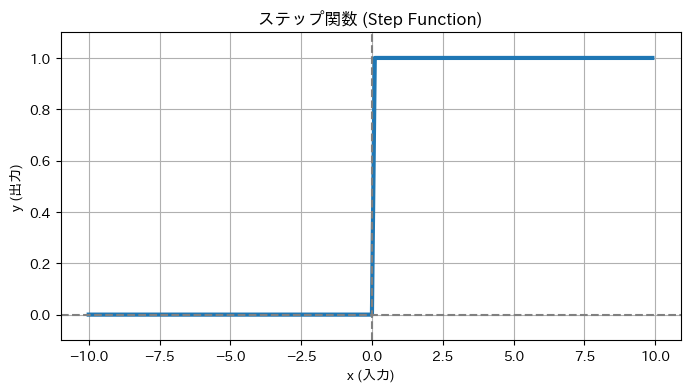

入力 x=0.5 のとき，出力 y=1.0
入力 x=-0.5 のとき，出力 y=0.0


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

# ステップ関数（単純パーセプトロンの活性化関数）を定義
def step_function(x):
    # x >= 0 なら 1.0, それ以外は 0.0 を返す
    return np.where(x >= 0, 1.0, 0.0)

# x軸の範囲を生成
x = np.arange(-10.0, 10.0, 0.1)
y = step_function(x)

# グラフ描画
plt.figure(figsize=(8, 4))
plt.plot(x, y, linewidth=3)
plt.title('ステップ関数 (Step Function)')
plt.xlabel('x (入力)')
plt.ylabel('y (出力)')
plt.grid(True)
plt.yticks(np.arange(0, 1.1, 0.2))
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.ylim(-0.1, 1.1)
plt.show()

# 出力例
print(f"入力 x=0.5 のとき，出力 y={step_function(0.5)}")
print(f"入力 x=-0.5 のとき，出力 y={step_function(-0.5)}")

<img src="../images/実習で学ぶ画像処理認識技術_2日目_08.jpg" width="1050">
<br>

In [35]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from util import simple_perceptron

# NumPyを使用して3x3の画像入力を定義（1を明るいピクセルとする）
input_o = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
]).flatten() # 1次元に平坦化して入力ベクトルとする (9次元)

# NGパターン（中央に「X」パターン）の定義
input_x = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
]).flatten() 

# --- 単純パーセプトロンのパラメータ (P.8の図より重みを想定) ---
# 「O」パターンに反応するような重みを定義（中央が負の値，周囲が正の値）
weight_o = np.array([
    [-1, 1, -1],
    [1, -1, 1],
    [-1, 1, -1]
]).flatten() 
bias = 4 # バイアス (b)

# 結果の表示
print("--- 単純パーセプトロンによる「○」判定 (P.8) ---")

# 「○」入力の判定
sum_o, net_o, output_o = simple_perceptron(input_o, weight_o, bias)
print(f"「○」入力:\n {input_o.reshape(3,3)}")
print(f"積和: {sum_o}, net_input: {net_o} (>=0? -> {net_o >= 0}), 出力 H: {output_o}")

# 「X」入力の判定 (P.8の2番目の例に相当)
sum_x, net_x, output_x = simple_perceptron(input_x, weight_o, bias)
print(f"\n「X」入力:\n {input_x.reshape(3,3)}")
print(f"積和: {sum_x}, net_input: {net_x} (>=0? -> {net_x >= 0}), 出力 H: {output_x}")

# P.8の結果では「○」に「1」を出力し，「X」に「0」を出力．
# これは，この重みとバイアスで「○」と「X」を線形分離できることを示す．

--- 単純パーセプトロンによる「○」判定 (P.8) ---
「○」入力:
 [[0 1 0]
 [1 0 1]
 [0 1 0]]
積和: 4, net_input: 0 (>=0? -> True), 出力 H: 1

「X」入力:
 [[1 0 1]
 [0 1 0]
 [1 0 1]]
積和: -5, net_input: -9 (>=0? -> False), 出力 H: 0


<img src="../images/実習で学ぶ画像処理認識技術_2日目_09.jpg" width="1050">
<br>
<img src="../images/実習で学ぶ画像処理認識技術_2日目_10.jpg" width="1050">
<br>
<img src="../images/実習で学ぶ画像処理認識技術_2日目_11.jpg" width="1050">
<br>

In [8]:
# --- P.12の線形分離不可能な例をシミュレーション ---

# 目的の重みとバイアス（P.11, P.12の図より想定）
# 周囲全体に反応するような重みを定義 (全て 1)
weight_all = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]).flatten() 
bias_p12 = -4 # バイアス (b=4)

# 入力画像1: 「○」パターン (P.11の1番目の入力)
input_o_p11 = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
]).flatten() 

# 入力画像2: 「X」パターン (P.11の2番目の入力)
input_x_p11 = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
]).flatten()

# 「○」パターンの判定
sum_o_p12, net_o_p12, output_o_p12 = simple_perceptron(input_o_p11, weight_all, bias_p12)
print(f"「○」入力: \n{input_o_p11.reshape(3,3)}")
print(f"積和: {sum_o_p12}, net_input: {net_o_p12} (>=0? -> {net_o_p12 >= 0}), 出力 H: {output_o_p12}")

sum_x_p12, net_x_p12, output_x_p12 = simple_perceptron(input_x_p11, weight_all, bias_p12)
print(f"\n「X」入力: \n{input_x_p11.reshape(3,3)}")
print(f"積和: {sum_x_p12}, net_input: {net_x_p12} (>=0? -> {net_x_p12 >= 0}), 出力 H: {output_x_p12}")

「○」入力: 
[[0 1 0]
 [1 0 1]
 [0 1 0]]
積和: 4, net_input: 8 (>=0? -> True), 出力 H: 1

「X」入力: 
[[1 0 1]
 [0 1 0]
 [1 0 1]]
積和: 5, net_input: 9 (>=0? -> True), 出力 H: 1


<img src="../images/実習で学ぶ画像処理認識技術_2日目_12.jpg" width="1050">
<br>

In [9]:
# 目的の重みとバイアス（P.11, P.12の図より想定）
# 周囲全体に反応するような重みを定義 (全て 1)
weight_all = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]).flatten() 
bias_p12 = 4 # バイアス (b=4)

# 入力画像3: 「□の右半分」パターン (P.12の1番目の入力)
input_right_half_p12 = np.array([
    [0, 1, 1],
    [0, 1, 1],
    [0, 0, 0]
]).flatten() 

# 入力画像4: 「上の行のみ」パターン (P.12の3番目の入力)
input_top_row_p12 = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [0, 0, 0]
]).flatten()

# 入力画像5: 「適当な4マス」パターン (P.12の4番目の入力)
input_random_4_p12 = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]).flatten()

# 入力画像6: 「全マス」パターン (P.12の5番目の入力)
input_all_p12 = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]).flatten()

print("\n--- 線形分離不可能な例 (P.12) ---")

# 「□の右半分」パターンの判定
sum_right_p12, net_right_p12, output_right_p12 = simple_perceptron(input_right_half_p12, weight_all, bias_p12)
print(f"\n「□の右半分」入力: \n{input_right_half_p12.reshape(3,3)}")
print(f"積和: {sum_right_p12}, net_input: {net_right_p12} (>=0? -> {net_right_p12 >= 0}), 出力 H: {output_right_p12}")

# 「上の行のみ」パターンの判定
sum_top_p12, net_top_p12, output_top_p12 = simple_perceptron(input_top_row_p12, weight_all, bias_p12)
print(f"\n「上の行のみ」入力: \n{input_top_row_p12.reshape(3,3)}")
print(f"積和: {sum_top_p12}, net_input: {net_top_p12} (>=0? -> {net_top_p12 >= 0}), 出力 H: {output_top_p12}")
# 「適当な4マス」パターンの判定
sum_random_4_p12, net_random_4_p12, output_random_4_p12 = simple_perceptron(input_random_4_p12, weight_all, bias_p12)
print(f"\n「適当な4マス」入力: \n{input_random_4_p12.reshape(3,3)}")
print(f"積和: {sum_random_4_p12}, net_input: {net_random_4_p12} (>=0? -> {net_random_4_p12 >= 0}), 出力 H: {output_random_4_p12}")  
# 「全マス」パターンの判定
sum_all_p12, net_all_p12, output_all_p12 = simple_perceptron(input_all_p12, weight_all, bias_p12)
print(f"\n「全マス」入力: \n{input_all_p12.reshape(3,3)}")
print(f"積和: {sum_all_p12}, net_input: {net_all_p12} (>=0? -> {net_all_p12 >= 0}), 出力 H: {output_all_p12}")



--- 線形分離不可能な例 (P.12) ---

「□の右半分」入力: 
[[0 1 1]
 [0 1 1]
 [0 0 0]]
積和: 4, net_input: 0 (>=0? -> True), 出力 H: 1

「上の行のみ」入力: 
[[1 1 1]
 [0 0 0]
 [0 0 0]]
積和: 3, net_input: -1 (>=0? -> False), 出力 H: 0

「適当な4マス」入力: 
[[1 0 0]
 [0 1 0]
 [0 0 1]]
積和: 3, net_input: -1 (>=0? -> False), 出力 H: 0

「全マス」入力: 
[[1 1 1]
 [1 1 1]
 [1 1 1]]
積和: 9, net_input: 5 (>=0? -> True), 出力 H: 1


<img src="../images/実習で学ぶ画像処理認識技術_2日目_13.jpg" width="1050">
<br>
<img src="../images/実習で学ぶ画像処理認識技術_2日目_14.jpg" width="1050">
<br>
<img src="../images/実習で学ぶ画像処理認識技術_2日目_15.jpg" width="1050">
<br>

In [10]:
# --- P.14の多層パーセプトロンによる「○」判定のシミュレーション ---

# 入力画像1: 「○」パターン (P.14の1番目の入力)
input_o_p14 = np.array([
    [0, 1, 0],
    [1, 0, 1],
    [0, 1, 0]
]).flatten() 

# 入力画像2: 「X」パターン (P.15の2番目の入力)
input_x_p15 = np.array([
    [1, 0, 1],
    [0, 1, 0],
    [1, 0, 1]
]).flatten() 

# --- 第1層のパラメータ (2つの単純パーセプトロン H1, H2 に相当) ---
# H1 (P.14, W1) - 「○」パターンの特徴を検出する重み（中央が負，周囲が正）
W1 = np.array([
    [-1, 1, -1],
    [1, -1, 1],
    [-1, 1, -1]
]).flatten() 
b1 = 4 # バイアス (b1)

# H2 (P.14, W2) - 「X」パターンの特徴を検出する重み（中央が正，周囲が負）
W2 = np.array([
    [1, -1, 1],
    [-1, 1, -1],
    [1, -1, 1]
]).flatten() 
b2 = 5 # バイアス (b2)

# --- 第2層のパラメータ (最終出力層 H3 に相当) ---
W3 = np.array([1, 1])
b3 = 1 # バイアス (b3)

def multi_layer_perceptron_p14(input_vector):
    # --- 第1層 (中間層) ---
    # H1の計算
    sum_h1, net_h1, output_h1 = simple_perceptron(input_vector, W1, b1)
    
    # H2の計算
    sum_h2, net_h2, output_h2 = simple_perceptron(input_vector, W2, b2)
    
    # 中間層の出力ベクトル
    intermediate_output = np.array([output_h1, output_h2])
    
    # --- 第2層 (出力層) ---
    # H3の計算
    sum_h3, net_h3, output_h3 = simple_perceptron(intermediate_output, W3, b3)
    
    return output_h1, output_h2, net_h3, output_h3

# 「○」入力の判定 (P.14の例)
o_h1, o_h2, o_net_h3, o_output_h3 = multi_layer_perceptron_p14(input_o_p14)
print(f"「○」入力: \n{input_o_p14.reshape(3,3)}")
print(f"中間層 H1出力: {o_h1}, H2出力: {o_h2}")
print(f"最終層 net_input: {o_net_h3}, 出力 H3: {o_output_h3}")

# 「X」入力の判定 (P.15の例)
x_h1, x_h2, x_net_h3, x_output_h3 = multi_layer_perceptron_p14(input_x_p15)
print(f"\n「X」入力: \n{input_x_p15.reshape(3,3)}")
print(f"中間層 H1出力: {x_h1}, H2出力: {x_h2}")
print(f"最終層 net_input: {x_net_h3}, 出力 H3: {x_output_h3}")

# P.14, P.15の図に対応した結果が得られ，「○」と「X」を正しく分類できている．

「○」入力: 
[[0 1 0]
 [1 0 1]
 [0 1 0]]
中間層 H1出力: 1, H2出力: 0
最終層 net_input: 0, 出力 H3: 1

「X」入力: 
[[1 0 1]
 [0 1 0]
 [1 0 1]]
中間層 H1出力: 0, H2出力: 1
最終層 net_input: 0, 出力 H3: 1


In [11]:
# 入力画像3: 「□の右半分」パターン (P.12の1番目の入力)
input_right_half_p12 = np.array([
    [0, 1, 1],
    [0, 1, 1],
    [0, 0, 0]
]).flatten() 

# 入力画像4: 「上の行のみ」パターン (P.12の3番目の入力)
input_top_row_p12 = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [0, 0, 0]
]).flatten()

# 入力画像5: 「適当な4マス」パターン (P.12の4番目の入力)
input_random_4_p12 = np.array([
    [1, 0, 0],
    [0, 1, 0],
    [0, 0, 1]
]).flatten()

# 入力画像6: 「全マス」パターン (P.12の5番目の入力)
input_all_p12 = np.array([
    [1, 1, 1],
    [1, 1, 1],
    [1, 1, 1]
]).flatten()

# 多重パーセプトロンでの判定例

output_h1_right, output_h2_right, net_h3_right, output_h3_right = multi_layer_perceptron_p14(input_right_half_p12)
print(f"\n「□の右半分」入力: \n{input_right_half_p12.reshape(3,3)}")
print(f"中間層 H1出力: {output_h1_right}, H2出力: {output_h2_right}")
print(f"最終層 net_input: {net_h3_right}, 出力 H3: {output_h3_right}")

output_h1_top, output_h2_top, net_h3_top, output_h3_top = multi_layer_perceptron_p14(input_top_row_p12)
print(f"\n「上の行のみ」入力: \n{input_top_row_p12.reshape(3,3)}")
print(f"中間層 H1出力: {output_h1_top}, H2出力: {output_h2_top}")
print(f"最終層 net_input: {net_h3_top}, 出力 H3: {output_h3_top}")

output_h1_random, output_h2_random, net_h3_random, output_h3_random = multi_layer_perceptron_p14(input_random_4_p12)
print(f"\n「適当な4マス」入力: \n{input_random_4_p12.reshape(3,3)}")
print(f"中間層 H1出力: {output_h1_random}, H2出力: {output_h2_random}")
print(f"最終層 net_input: {net_h3_random}, 出力 H3: {output_h3_random}")

output_h1_all, output_h2_all, net_h3_all, output_h3_all = multi_layer_perceptron_p14(input_all_p12)
print(f"\n「全マス」入力: \n{input_all_p12.reshape(3,3)}")
print(f"中間層 H1出力: {output_h1_all}, H2出力: {output_h2_all}")
print(f"最終層 net_input: {net_h3_all}, 出力 H3: {output_h3_all}")



「□の右半分」入力: 
[[0 1 1]
 [0 1 1]
 [0 0 0]]
中間層 H1出力: 0, H2出力: 0
最終層 net_input: -1, 出力 H3: 0

「上の行のみ」入力: 
[[1 1 1]
 [0 0 0]
 [0 0 0]]
中間層 H1出力: 0, H2出力: 0
最終層 net_input: -1, 出力 H3: 0

「適当な4マス」入力: 
[[1 0 0]
 [0 1 0]
 [0 0 1]]
中間層 H1出力: 0, H2出力: 0
最終層 net_input: -1, 出力 H3: 0

「全マス」入力: 
[[1 1 1]
 [1 1 1]
 [1 1 1]]
中間層 H1出力: 0, H2出力: 0
最終層 net_input: -1, 出力 H3: 0


---

### **演習課題①**：3*3内の特定の直線判定パーセプトロンの実装せよ

#### **概要**
3×3 の二値画像（0 または 1）を入力とし，**特定の縦・横・斜めの直線パターン**を検出するパーセプトロンを実装せよ．  
「特定直線パターン」とは，以下に示す入力パターン例のうち，**縦線（中央），横線（中央），斜め線（左上→右下）**の3種類を指す．  
サンプルコード内のW_FILTER(重み)，B_BIAS(バイアス)を適切に設定し，テストケースを突破することを目標とする．


#### **入力パターン例**

| 種類 | 3×3 パターン |
|------|---------------|
| **縦線（中央）** | `[[1,0,0],`<br>` [1,0,0],`<br>` [1,0,0]]` |
| **横線（中央）** | `[[0,0,0],`<br>` [1,1,1],`<br>` [0,0,0]]` |
| **斜め線（左上→右下）** | `[[1,0,0],`<br>` [0,1,0],`<br>` [0,0,1]]` |
| **L字（だめな例1）** | `[[1,0,0],`<br>` [1,0,0],`<br>` [1,1,1]]` |
| **点（だめな例2）** | `[[0,0,0],`<br>` [0,1,0],`<br>` [0,0,0]]` |


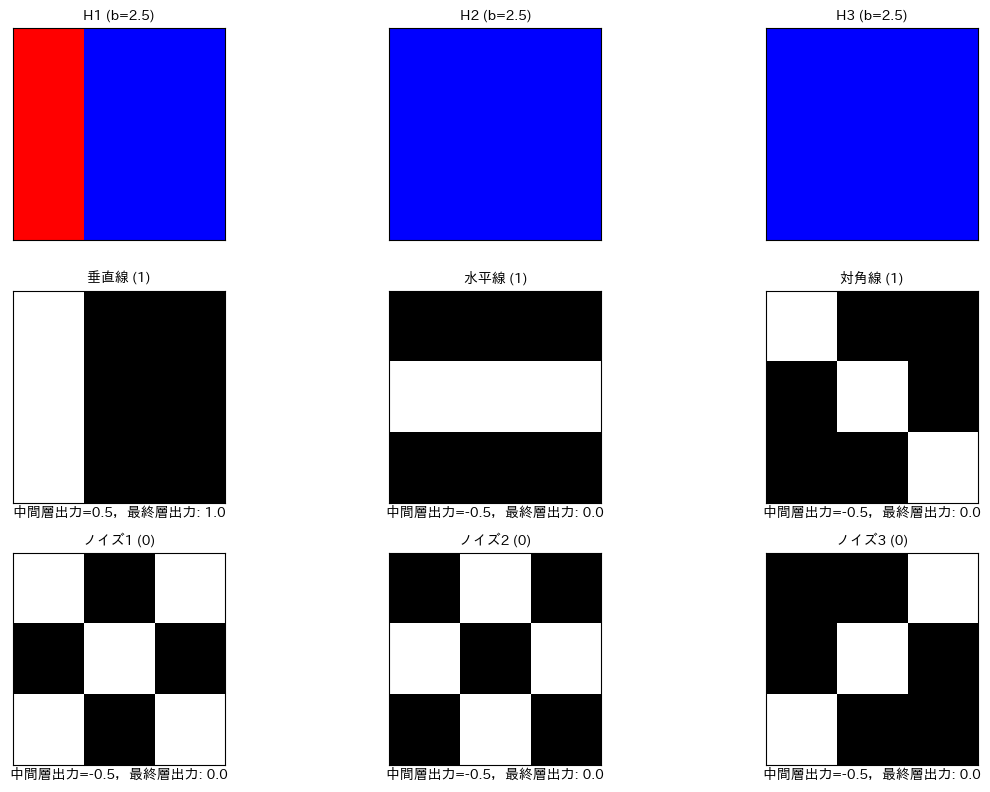


--- 最終判定結果 ---
垂直線 (1): 判定結果 = 1
水平線 (1): 判定結果 = 0
対角線 (1): 判定結果 = 0
ノイズ1 (0): 判定結果 = 0
ノイズ2 (0): 判定結果 = 0
ノイズ3 (0): 判定結果 = 0


In [36]:
from util import get_test_patterns, visualize_filters_and_tests
import numpy as np
import japanize_matplotlib

# --- 編集する部分 ---
W_H_3X3_List = [
    np.array([[1, -1, -1],
              [1, -1, -1],
              [1, -1, -1]]),
    np.array([[-1, -1, -1],
              [-1, -1, -1],
              [-1, -1, -1]]), 
    np.array([[-1, -1, -1],
              [-1, -1, -1],
              [-1, -1, -1]])
]

W_H = np.array([w.flatten() for w in W_H_3X3_List])
B_H = np.array([2.5, 2.5, 2.5])

W_OUT = np.array([1, 1, 1])
B_OUT = 0.5

# --- テストパターンを取得 ---
TEST_PATTERNS = get_test_patterns()

# --- 可視化 ---
visualize_filters_and_tests(W_H, B_H, W_OUT, B_OUT, TEST_PATTERNS)



---

<img src="../images/実習で学ぶ画像処理認識技術_2日目_16.jpg" width="1050">
<br>
<img src="../images/実習で学ぶ画像処理認識技術_2日目_17.jpg" width="1050">
<br>
<img src="../images/実習で学ぶ画像処理認識技術_2日目_24.jpg" width="1050">
<br>
<img src="../images/実習で学ぶ画像処理認識技術_2日目_25.jpg" width="1050">
<br>

---

### **3. 3層ニューラルネットワーク（MLP）の訓練＆検証**
最も単純な構造のMLPを定義し，MNISTデータを用いて学習と検証を行う．  
MNIST：手書き数字の画像データセット．0から9までの数字が含まれる．  
学習後は，学習の進み具合やテスト画像の予測結果，混同行列の可視化などを行う．  
また，MLPのハイパーパラメータを変更して，学習結果に与える影響を確認する．  
以下イメージ図．  
<img src="../images/mlp.png" width="850">
<br>

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns

# GPU利用設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("使用デバイス:", device)

# データ変換（Tensor化＋正規化）
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# MNISTのダウンロード＆読み込み
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)

使用デバイス: cuda
Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 404: Not Found



100.0%

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



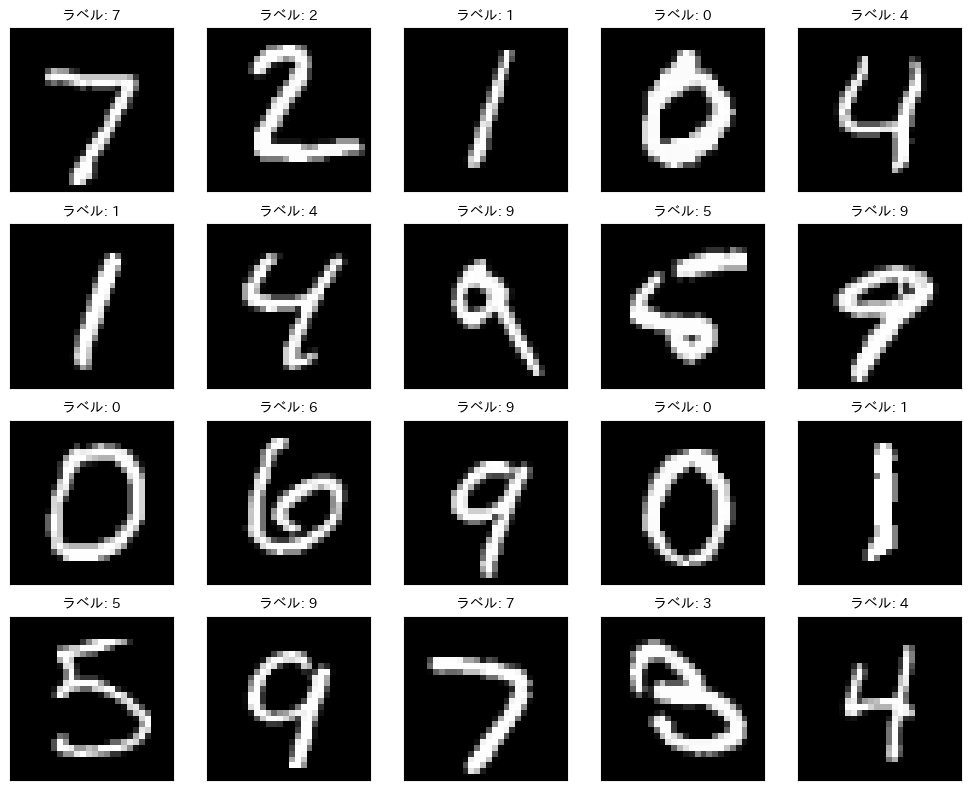

In [14]:
# MNISTの画像を10例表示
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i, (img, label) in enumerate(test_dataset):
    if i >= 20:
        break
    ax = axes[i // 5, i % 5]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f"ラベル: {label}", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

In [15]:
# 3層NNのモデルクラスを定義 (入力層、隠れ層、出力層の3層)
class ThreeLayerNN(nn.Module):
    # コンストラクタ: ネットワークの構造を定義する
    def __init__(self):
        super(ThreeLayerNN, self).__init__()
        
        # MNIST画像は28x28ピクセルで、1チャンネル（グレースケール）
        # 入力層のノード数（特徴量の総数）は 28 * 28 = 784
        input_size = 28 * 28 
        # 隠れ層のノード数（ハイパーパラメータとして自由に設定可能。ここでは512に設定）
        hidden_size = 16
        # 出力層のノード数（MNISTは0-9の10クラス分類なので10）
        output_size = 10 
        
        # 1. 入力層 -> 隠れ層1 (全結合層: Linear)
        # nn.Linear(入力サイズ, 出力サイズ)
        self.fc1 = nn.Linear(input_size, hidden_size)
        
        # 2. 隠れ層1 -> 隠れ層2 (もう一つの全結合層)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        
        # 3. 隠れ層2 -> 出力層
        self.fc3 = nn.Linear(hidden_size, output_size)

    # 順伝播の処理を定義する
    def forward(self, x):
        # 画像データを全結合層に通す前に、1次元に平坦化（Flatten）する必要がある
        # x.size(0)はバッチサイズ。-1を指定することで、残りの次元を自動で計算(28*28)
        # 例: (64, 1, 28, 28) -> (64, 784)
        x = x.view(x.size(0), -1) 
        
        # 隠れ層1: 全結合層(fc1)の後にReLU活性化関数を適用
        x = F.relu(self.fc1(x))
        
        # 隠れ層2: 全結合層(fc2)の後にReLU活性化関数を適用
        x = F.relu(self.fc2(x))
        
        # 出力層: 全結合層(fc3)を適用。活性化関数は損失関数(CrossEntropyLoss)に含まれるため、ここでは適用しない
        x = self.fc3(x)
        
        return x

# モデルのインスタンス化とデバイスへの転送
model = ThreeLayerNN().to(device)
print(model)

ThreeLayerNN(
  (fc1): Linear(in_features=784, out_features=16, bias=True)
  (fc2): Linear(in_features=16, out_features=16, bias=True)
  (fc3): Linear(in_features=16, out_features=10, bias=True)
)


In [16]:
def train(model, loader, optimizer, criterion):
    """モデルを訓練する関数"""
    model.train() # モデルを訓練モードに設定
    total_loss = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device) # データをデバイスへ転送

        optimizer.zero_grad() # 勾配をゼロにリセット
        outputs = model(images) # 順伝播: 入力から出力を計算
        loss = criterion(outputs, labels) # 損失（誤差）を計算
        loss.backward() # 誤差逆伝播: 勾配を計算
        optimizer.step() # パラメータ（重みとバイアス）を更新

        total_loss += loss.item()
    return total_loss / len(loader)

def test(model, loader, criterion):
    """モデルを評価する関数"""
    model.eval() # モデルを評価モードに設定（Dropoutなどが無効になる）
    correct = 0
    total_loss = 0
    # 勾配計算をしない
    with torch.no_grad(): 
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            pred = outputs.argmax(dim=1) # 最大値のインデックス（予測クラス）を取得
            correct += pred.eq(labels).sum().item() # 正解数をカウント
    acc = correct / len(loader.dataset) # 正解率を計算
    return total_loss / len(loader), acc

# 学習履歴を記録するリスト
train_losses, test_losses, test_accs = [], [], []

# 損失関数: nn.CrossEntropyLoss()は分類問題で一般的に使用される
criterion = nn.CrossEntropyLoss()
# 最適化アルゴリズム: Adamを使用（lr=0.001は学習率）
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 学習ループ
num_epochs = 10
for epoch in range(num_epochs):
    train_loss = train(model, train_loader, optimizer, criterion)
    test_loss, test_acc = test(model, test_loader, criterion)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    print(f"Epoch {epoch+1}: TrainLoss={train_loss:.4f}, TestLoss={test_loss:.4f}, TestAcc={test_acc*100:.2f}%")

Epoch 1: TrainLoss=0.7016, TestLoss=0.4130, TestAcc=87.63%
Epoch 2: TrainLoss=0.3564, TestLoss=0.3045, TestAcc=91.33%
Epoch 3: TrainLoss=0.3019, TestLoss=0.2765, TestAcc=92.02%
Epoch 4: TrainLoss=0.2817, TestLoss=0.2726, TestAcc=92.06%
Epoch 5: TrainLoss=0.2654, TestLoss=0.2497, TestAcc=92.64%
Epoch 6: TrainLoss=0.2538, TestLoss=0.2471, TestAcc=92.90%
Epoch 7: TrainLoss=0.2452, TestLoss=0.2406, TestAcc=92.88%
Epoch 8: TrainLoss=0.2367, TestLoss=0.2605, TestAcc=92.21%
Epoch 9: TrainLoss=0.2275, TestLoss=0.2387, TestAcc=93.11%
Epoch 10: TrainLoss=0.2196, TestLoss=0.2296, TestAcc=93.29%


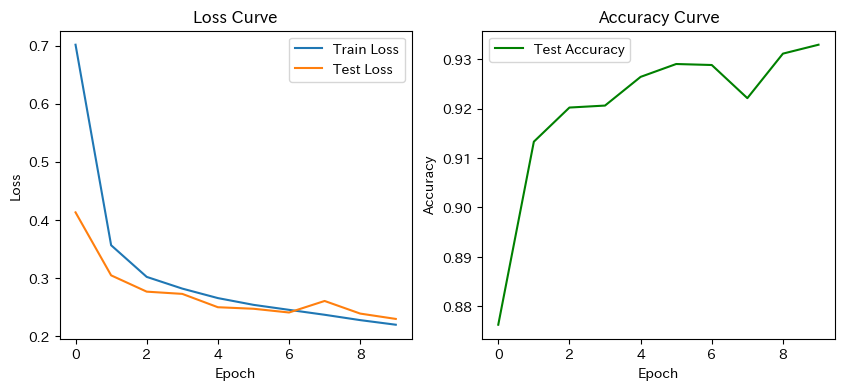

In [17]:
# 学習曲線の描画
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_accs, label="Test Accuracy", color='green')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


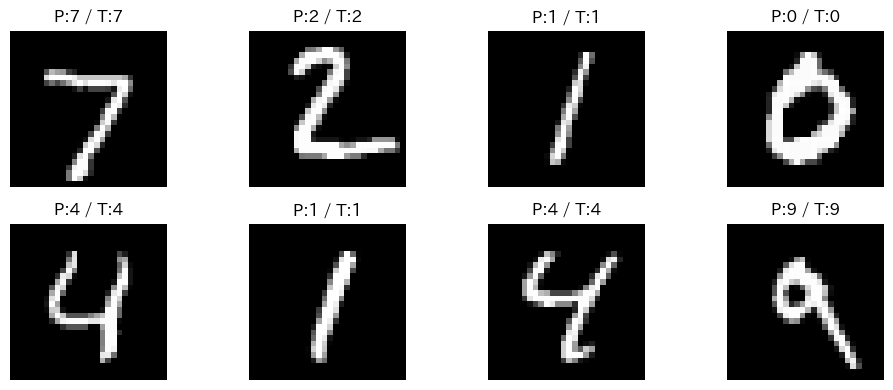

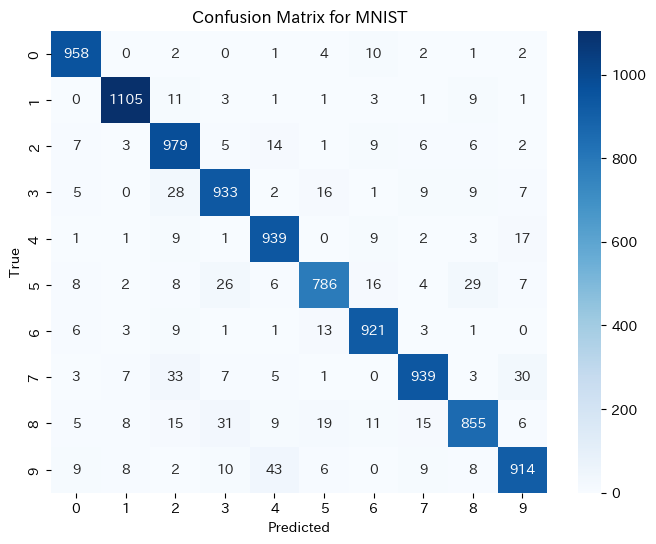

Test Loss: 0.2296, Test Accuracy: 93.29%


In [18]:
# 予測例表示
model.eval()
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
outputs = model(images)
preds = outputs.argmax(dim=1)

plt.figure(figsize=(10,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i].cpu().squeeze(), cmap="gray")
    plt.title(f"P:{preds[i].item()} / T:{labels[i].item()}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# 全テストデータに対して予測
all_preds, all_labels = [], []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 混同行列
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix for MNIST")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 最終精度
test_loss, test_acc = test(model, test_loader, criterion)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc*100:.2f}%")


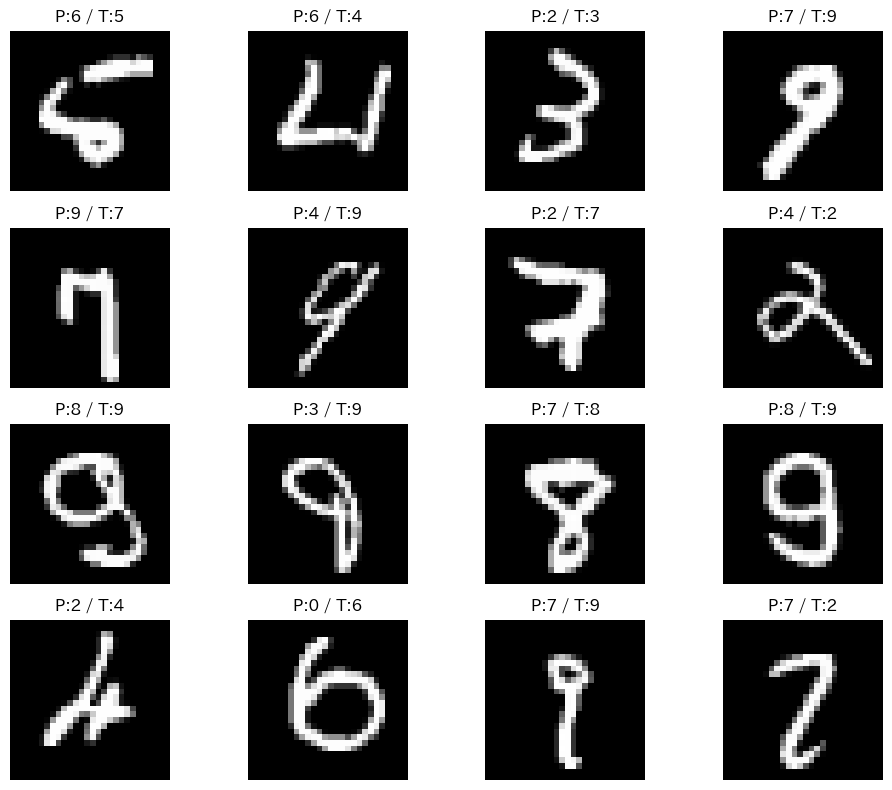

In [19]:
# 予測失敗した例の表示
incorrect_indices = [i for i, (p, t) in enumerate(zip(all_preds, all_labels)) if p != t]
plt.figure(figsize=(10,8))
for i, idx in enumerate(incorrect_indices[:16]):
    img, label = test_dataset[idx]
    plt.subplot(4,4,i+1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"P:{all_preds[idx]} / T:{label}")
    plt.axis("off")
plt.tight_layout()
plt.show()

---

### **演習課題②**：分類精度0.99以上のCNNを構築せよ
#### **概要**
本課題では, PyTorch を用いて手書き数字データセット（MNIST）の分類を行う**全結合型の3層ニューラルネットワーク（MLP）**を構築する.   
サンプルコードを参考にモデルを実装し, 訓練・検証を通して分類精度（Accuracy）0.99以上を達成することを目標とする.  

#### **手順**
1. MLPモデルの実装
    - サンプルコードを参考に, 3層ニューラルネットワークを実装する.
2. 訓練・検証
    - サンプルコードを参考に, MNISTデータセットを用いてモデルの訓練・検証を行う.
3. 精度向上のための工夫を実施
    - モデル構造の変更
        - 層の数，ノード数，活性化関数(ReLu，LeakyReLu，GELU等)を変更する...etc
    - 学習パラメータの変更
        - epoch数，学習率，バッチサイズ，最適化手法(SGD，Adam，RMSprop等)を変更する...etc
    - データ拡張の導入
        - 回転，平行移動，拡大縮小，ノイズ付加など...etc
        - 前回の画像処理パートでやった内容が参考になるかも？
    - その他
        - 正則化項(Dropout，BatchNorm等)の導入，重み初期化や学習率減衰の工夫，early stoppingの導入...etc

4. CNNモデルの構築(任意課題)
    - さらに高精度を目指す場合は, 畳み込みニューラルネットワーク(CNN)を構築してみるのも良い.  
        - 多分MLPより精度がでやすいはず.
    - 資料末尾にCNNのサンプルコードを掲載しているので, 参考にしてほしい.
#### **発表**
次回の情報科学演習までに, 改善したモデルの内容と精度に関して, 3〜5分程度のプレゼンテーション資料を準備すること.  
- 工夫点
    - モデル構造
    - 学習パラメータ
    - データ拡張
- 精度とその分析
    - 最終精度
    - 学習曲線（損失，精度）
    - 混同行列


---
### **幾何学的画像拡張のサンプルコード**

In [20]:
import torch
import numpy as np
import cv2 # 幾何学的変換の行列（アフィン行列）計算に使用
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
import random
from util import display_transforms

# ===================================================================
# 共通データセット準備（ラベル指定機能を追加）
# ===================================================================

# PIL Image形式で画像をロード（生の画像データが必要なため）
mnist_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=None)

TARGET_LABEL = 6 # 例: '8'の画像を取得

# 指定したラベルを持つ画像のインデックスをリストアップ
# .targetsはデータセットの全ラベル（Tensor）
target_indices = (mnist_dataset.targets == TARGET_LABEL).nonzero(as_tuple=True)[0]

if len(target_indices) == 0:
    print(f"エラー: ラベル {TARGET_LABEL} の画像が見つかりませんでした。")
else:
    # リストアップされたインデックスの中からランダムに一つを選択
    random_target_index = random.choice(target_indices)
    
    # 選択されたインデックスを使って画像とラベルを取得
    # .dataは実際の画像データ（PIL Imageではないので、transforms.ToPILImage()を使うか、
    # .dataと.targetsから直接取得する）
    
    # ここでは、元のインデックス (0~9999) を使ってデータセットから取得し直す
    index_in_dataset = random_target_index.item()
    original_pil_img, label = mnist_dataset[index_in_dataset]

    # Matplotlibで表示するためにNumPy配列に変換
    # HxW (28x28)のグレースケールNumPy配列
    original_np_img = np.array(original_pil_img) 

    print(f"ターゲットラベル: {TARGET_LABEL} に設定")
    print(f"選択された画像のデータセット内のインデックス: {index_in_dataset}, ラベル: {label}")
    print("--- 以下のコードセルでこの元画像に変換を適用します ---")


ターゲットラベル: 6 に設定
選択された画像のデータセット内のインデックス: 8637, ラベル: 6
--- 以下のコードセルでこの元画像に変換を適用します ---


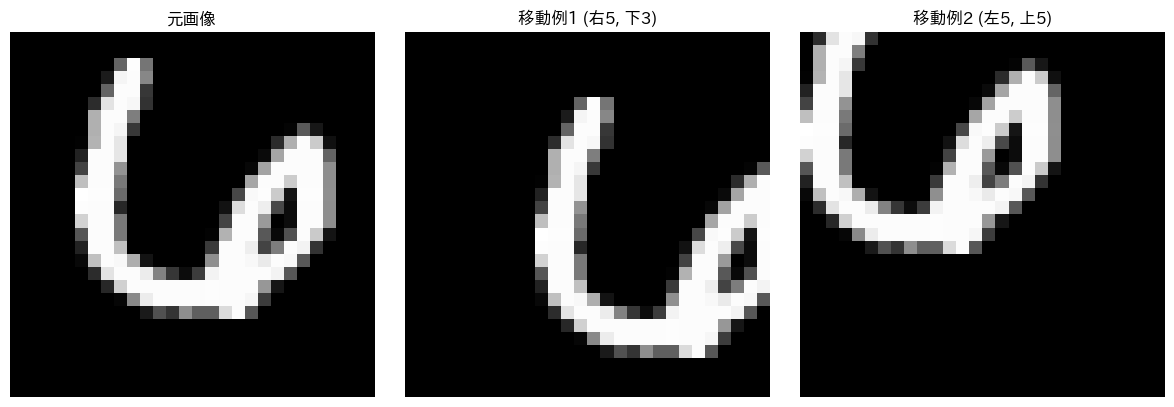

In [21]:
# ===================================================================
# 幾何学的変換：平行移動 (Translation)
# ===================================================================

# 画像のサイズ
(h, w) = original_np_img.shape

# --- 例1: 右に5ピクセル、下に3ピクセル移動 ---
tx1, ty1 = 5, 3
# 2x3の移動行列 [ [1, 0, tx], [0, 1, ty] ] を定義
M1 = np.float32([
    [1, 0, tx1],
    [0, 1, ty1]
])
# cv2.warpAffineで変換を適用
translated_img1 = cv2.warpAffine(original_np_img, M1, (w, h))

# --- 例2: 左に-7ピクセル、上に-7ピクセル移動 ---
tx2, ty2 = -5, -5
M2 = np.float32([
    [1, 0, tx2],
    [0, 1, ty2]
])
translated_img2 = cv2.warpAffine(original_np_img, M2, (w, h))

# 可視化
display_transforms(
    original_np_img,
    [translated_img1, translated_img2],
    [f"移動例1 (右{tx1}, 下{ty1})", f"移動例2 (左{-tx2}, 上{-ty2})"]
)

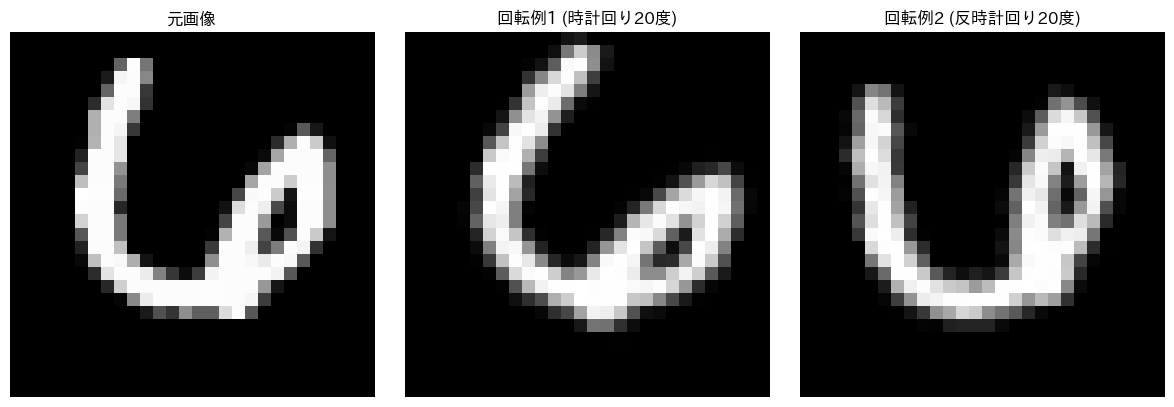

In [22]:
# ===================================================================
# 幾何学的変換：回転 (Rotation)
# ===================================================================

# 画像のサイズと中心座標
(h, w) = original_np_img.shape
center = (w // 2, h // 2)

# --- 例1: 時計回りに15度回転 ---
angle1 = 20
scale1 = 1.0 # 拡大率は1.0に固定
# 回転行列を計算
M1 = cv2.getRotationMatrix2D(center, -angle1, scale1) # -angleで時計回り
# 変換を適用
rotated_img1 = cv2.warpAffine(original_np_img, M1, (w, h))

# --- 例2: 反時計回りに25度回転 ---
angle2 = -20
scale2 = 1.0
# 回転行列を計算
M2 = cv2.getRotationMatrix2D(center, -angle2, scale2) # -(-angle) = +angleで反時計回り
# 変換を適用
rotated_img2 = cv2.warpAffine(original_np_img, M2, (w, h))

# 可視化
display_transforms(
    original_np_img,
    [rotated_img1, rotated_img2],
    [f"回転例1 (時計回り{angle1}度)", f"回転例2 (反時計回り{-angle2}度)"]
)

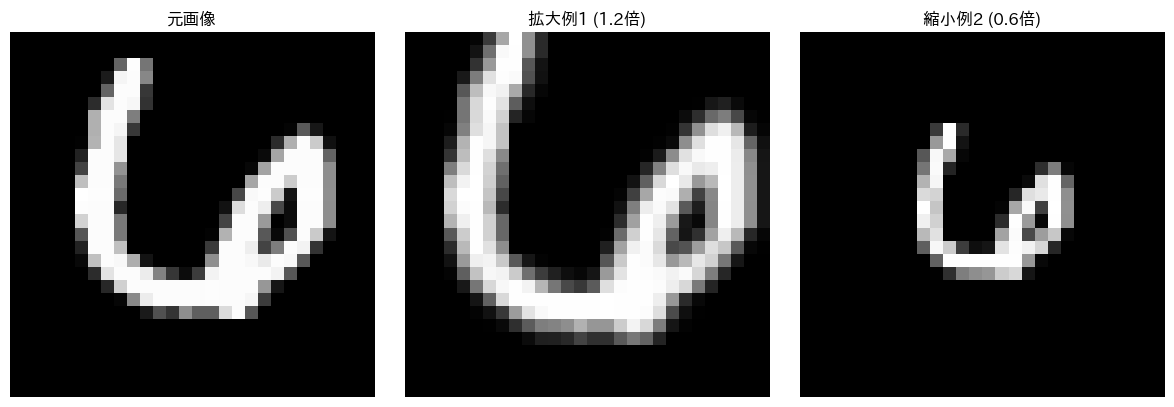

In [23]:
# ===================================================================
# 幾何学的変換：拡大・縮小 (Scaling)
# ===================================================================

# 画像のサイズと中心座標
(h, w) = original_np_img.shape
center = (w // 2, h // 2)
angle = 0 # 回転なし

# --- 例1: 1.2倍に拡大（ズームイン） ---
scale1 = 1.2
# 回転行列を計算 (角度0でスケールのみ適用)
M1 = cv2.getRotationMatrix2D(center, angle, scale1) 
# 変換を適用
scaled_img1 = cv2.warpAffine(original_np_img, M1, (w, h))

# --- 例2: 0.8倍に縮小（ズームアウト） ---
scale2 = 0.6
# 回転行列を計算
M2 = cv2.getRotationMatrix2D(center, angle, scale2)
# 変換を適用
scaled_img2 = cv2.warpAffine(original_np_img, M2, (w, h))

# 可視化
display_transforms(
    original_np_img,
    [scaled_img1, scaled_img2],
    [f"拡大例1 ({scale1:.1f}倍)", f"縮小例2 ({scale2:.1f}倍)"]
)

---

### **CNNに関する資料，サンプルコード**

<img src="../images/実習で学ぶ画像処理認識技術_2日目_19.jpg" width="1050">
<br>
<img src="../images/実習で学ぶ画像処理認識技術_2日目_20.jpg" width="1050">
<br>
<img src="../images/実習で学ぶ画像処理認識技術_2日目_21.jpg" width="1050">
<br>

In [24]:
from util import sigmoid

# 入力画像（3x3，P.20の走査範囲を想定）
input_img_p21 = np.array([
    [10, 3, 10, 5, 10],
    [10, 10, 5, 10, 10],
    [10, 7, 10, 3, 10],
    [10, 10, 10, 10, 10],
    [10, 10, 10, 10, 10]
])

# 重み（カーネル/フィルタ） (3x3，P.20のWを想定)
kernel_p20 = np.array([
    [-1, 1, -1],
    [1, -1, 1],
    [-1, 1, -1]
])
bias_conv = 4 # バイアス (b)

# 畳み込み演算をシミュレーションする関数
def convolution_step(input_region, kernel, bias):
    # 積和演算: 入力領域とカーネル（重み）の内積
    weighted_sum = np.sum(input_region * kernel)
    
    # バイアスを引く
    net_input = weighted_sum - bias
    
    # 活性化関数を適用（ここではSigmoidを想定 - P.20の図より）
    output = sigmoid(net_input)
    
    return weighted_sum, output

# 入力画像の左上3x3領域 (P.20の走査範囲)
input_region_p20 = input_img_p21[0:3, 0:3]

# P.20のシミュレーション
sum_p20, output_p20 = convolution_step(input_region_p20, kernel_p20, bias_conv)

print("--- 畳み込み層の動作 (P.20) ---")
print(f"入力領域 (3x3):\n{input_region_p20}")
print(f"カーネル (3x3):\n{kernel_p20}")
print(f"積和: {sum_p20}")
# P.20の計算例では net_input = 0 となり，出力はステップ関数で 1 を想定．
# Sigmoidの場合，0.5に近い値が出力される．
print(f"net_input (積和 - バイアス): {sum_p20 - bias_conv}")
print(f"活性化関数（Sigmoid）出力: {output_p20:.8f}")

# --- P.21の走査範囲を想定（少し異なるパターン） ---
# P.21の走査範囲（例として，右上2x2が暗いエッジ部分を想定）

# 走査位置を右上に移動 (例: 1行1列目から開始)
input_region_p21 = input_img_p21[0:3, 1:4] 

# P.21のシミュレーション
sum_p21, output_p21 = convolution_step(input_region_p21, kernel_p20, bias_conv)

print("\n--- 畳み込み層の動作 (P.21 - 走査位置移動) ---")
print(f"入力領域 (3x3):\n{input_region_p21}")
print(f"積和: {sum_p21}")
# P.21の計算例では net_input = -2 となり，出力はステップ関数で 0 を想定．
print(f"net_input (積和 - バイアス): {sum_p21 - bias_conv}")
print(f"活性化関数（Sigmoid）出力: {output_p21:.8f}")

--- 畳み込み層の動作 (P.20) ---
入力領域 (3x3):
[[10  3 10]
 [10 10  5]
 [10  7 10]]
カーネル (3x3):
[[-1  1 -1]
 [ 1 -1  1]
 [-1  1 -1]]
積和: -25
net_input (積和 - バイアス): -29
活性化関数（Sigmoid）出力: 0.00000000

--- 畳み込み層の動作 (P.21 - 走査位置移動) ---
入力領域 (3x3):
[[ 3 10  5]
 [10  5 10]
 [ 7 10  3]]
積和: 17
net_input (積和 - バイアス): 13
活性化関数（Sigmoid）出力: 0.99999774


<img src="../images/実習で学ぶ画像処理認識技術_2日目_22.jpg" width="1050">
<br>
<img src="../images/実習で学ぶ画像処理認識技術_2日目_23.jpg" width="1050">
<br>
<img src="../images/実習で学ぶ画像処理認識技術_2日目_18.jpg" width="1050">
<br>

---

### **CNNを用いてMNISTデータセットの分類を行うサンプルコード**

In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# GPU利用設定
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("使用デバイス:", device)

# データ変換（Tensor化＋正規化）
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# MNISTのダウンロード＆読み込み
train_dataset = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root="./data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=1000, shuffle=False)


使用デバイス: cuda


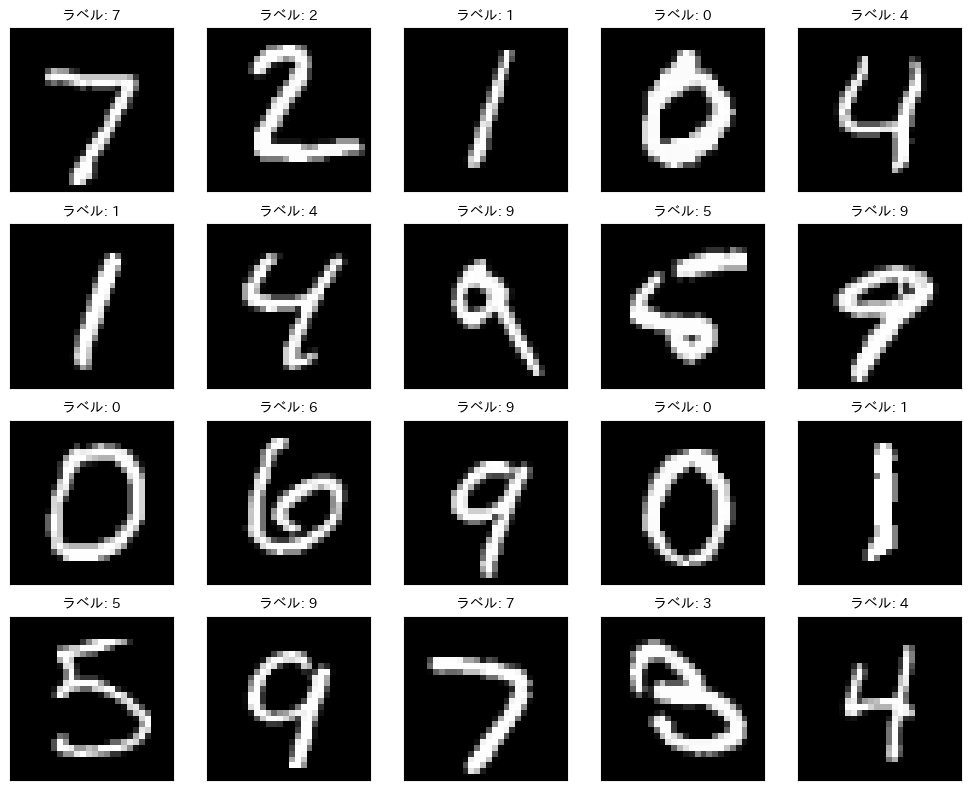

In [26]:
# MNISTの画像を10例表示
import matplotlib.pyplot as plt
fig, axes = plt.subplots(4, 5, figsize=(10, 8))
for i, (img, label) in enumerate(test_dataset):
    if i >= 20:
        break
    ax = axes[i // 5, i % 5]
    ax.imshow(img.squeeze(), cmap='gray')
    ax.set_title(f"ラベル: {label}", fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])
plt.tight_layout()
plt.show()

In [27]:
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv = nn.Conv2d(1, 8, kernel_size=3, padding=1)  # 1層だけ
        self.fc = nn.Linear(8 * 28 * 28, 10)

    def forward(self, x):
        x = F.relu(self.conv(x))
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

model = SimpleCNN().to(device)
print(model)


SimpleCNN(
  (conv): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc): Linear(in_features=6272, out_features=10, bias=True)
)


In [28]:
def train(model, loader, optimizer, criterion):
    model.train()
    total_loss = 0
    for images, labels in loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(loader)

def test(model, loader, criterion):
    model.eval()
    correct = 0
    total_loss = 0
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            pred = outputs.argmax(dim=1)
            correct += pred.eq(labels).sum().item()
    acc = correct / len(loader.dataset)
    return total_loss / len(loader), acc


In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 学習履歴を記録するリスト
train_losses, test_losses, test_accs = [], [], []

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 学習ループ
for epoch in range(5):
    train_loss = train(model, train_loader, optimizer, criterion)
    test_loss, test_acc = test(model, test_loader, criterion)
    train_losses.append(train_loss)
    test_losses.append(test_loss)
    test_accs.append(test_acc)
    print(f"Epoch {epoch+1}: TrainLoss={train_loss:.4f}, TestLoss={test_loss:.4f}, TestAcc={test_acc*100:.2f}%")


Epoch 1: TrainLoss=0.2310, TestLoss=0.1116, TestAcc=96.86%
Epoch 2: TrainLoss=0.0888, TestLoss=0.0838, TestAcc=97.44%
Epoch 3: TrainLoss=0.0660, TestLoss=0.0790, TestAcc=97.62%
Epoch 4: TrainLoss=0.0531, TestLoss=0.0756, TestAcc=97.63%
Epoch 5: TrainLoss=0.0449, TestLoss=0.0738, TestAcc=97.82%


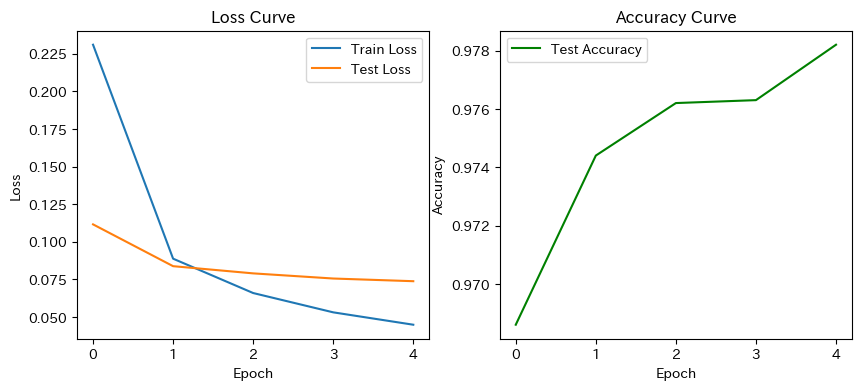

In [30]:
# 学習曲線の描画
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(train_losses, label="Train Loss")
plt.plot(test_losses, label="Test Loss")
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(test_accs, label="Test Accuracy", color='green')
plt.title("Accuracy Curve")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


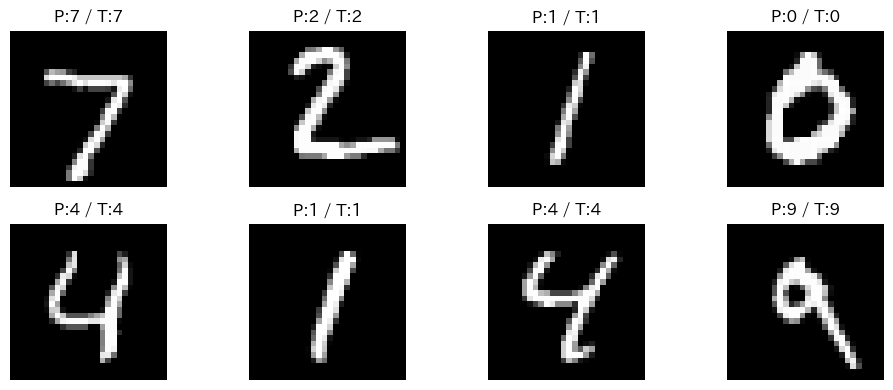

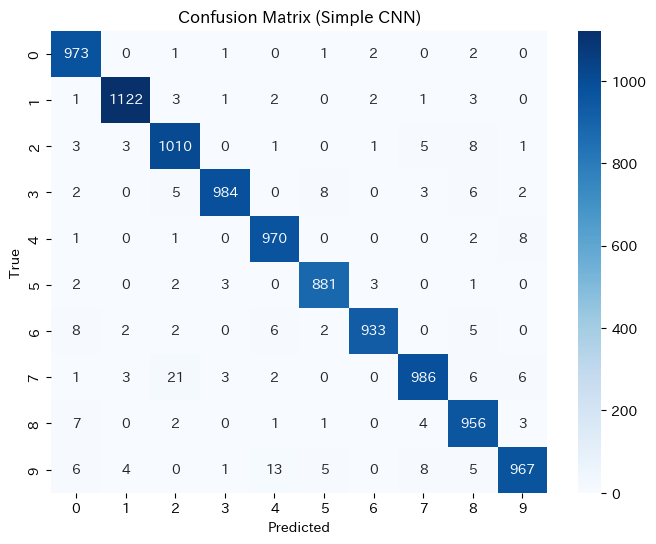

In [31]:
# 予測例表示
model.eval()
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
outputs = model(images)
preds = outputs.argmax(dim=1)

plt.figure(figsize=(10,4))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.imshow(images[i].cpu().squeeze(), cmap="gray")
    plt.title(f"P:{preds[i].item()} / T:{labels[i].item()}")
    plt.axis("off")
plt.tight_layout()
plt.show()

# 全テストデータに対して予測
all_preds, all_labels = [], []
model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        preds = outputs.argmax(dim=1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# 混同行列
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix (Simple CNN)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


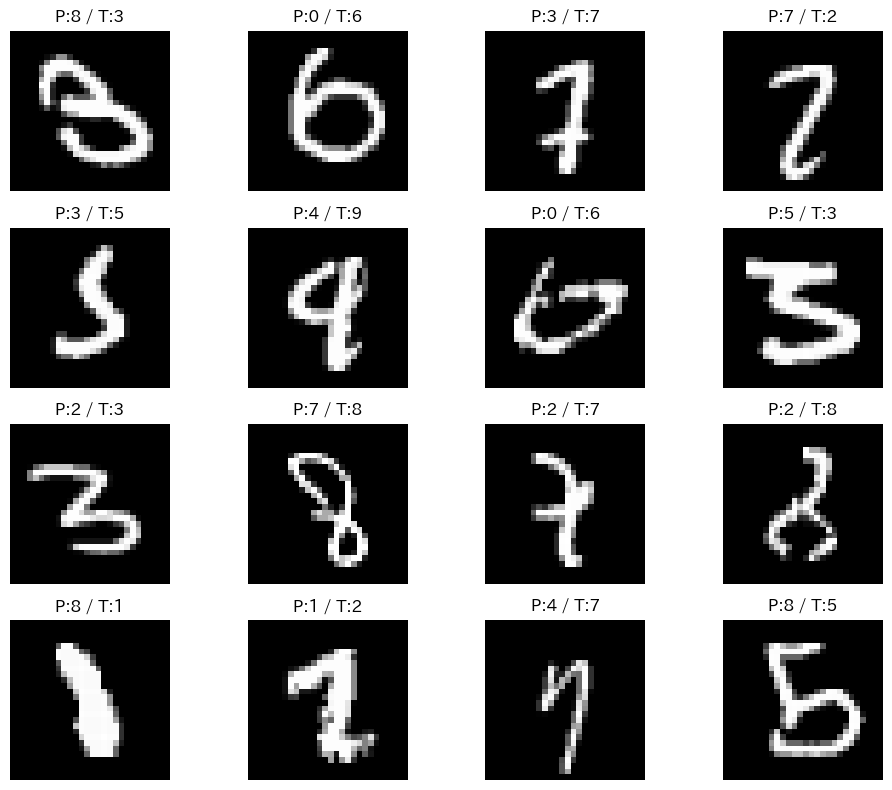

In [32]:
# 予測失敗した例の表示
incorrect_indices = [i for i, (p, t) in enumerate(zip(all_preds, all_labels)) if p != t]
plt.figure(figsize=(10,8))
for i, idx in enumerate(incorrect_indices[:16]):
    img, label = test_dataset[idx]
    plt.subplot(4,4,i+1)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"P:{all_preds[idx]} / T:{label}")
    plt.axis("off")
plt.tight_layout()
plt.show()